In [12]:
import numpy as np
import random

import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML
from matplotlib import cm

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

%matplotlib inline

random.seed(30)
np.random.seed(seed=30)

print('check random: ', random.randint(0,100))
print('check numpy random: ', np.random.randint(0,100))


check random:  69
check numpy random:  37


In [53]:
#function that models the problem
def fitness_function(position):
    return position[0]**2 + position[1]**2 + 1


# #function that models the problem
# def fitness_function(position):
#     A = 10
#     f = 0
#     for j in range(2):
#         f = f + position[j]**2 - A*np.cos(2*np.pi*position[j])
#     return A*2 + f

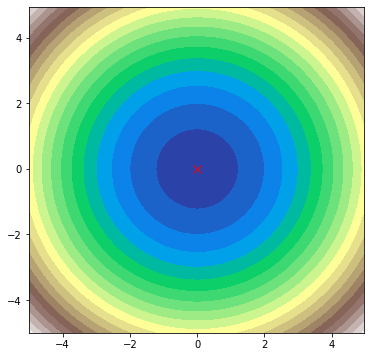

fitness: 1


In [54]:
delta = .05
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = fitness_function([X,Y])

fig, ax = plt.subplots(figsize=(6,6))
cmap = cm.get_cmap(name='terrain', lut=None)
# cmap = cm.get_cmap(name='viridis', lut=None)

CS = ax.contourf(X, Y, Z1, 19, cmap=cmap)

plt.plot(0,0, 'rx', markersize=8)

plt.show()

print('fitness:',fitness_function([0,0]))

In [10]:
#Some variables to calculate the velocity
W = 0.5
c1 = 0.015
c2 = 0.09
target = 0

# variables tha control optimizer
n_iterations = 1000
target_error = 1e-6

# create population
n_dim = 2
n_particles = 500

In [61]:
def pso(W, c1, c2, target, n_iterations, target_error, n_particles, n_dim):
    
    random.seed(30)
    np.random.seed(seed=30)

    particle_position_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1))) * random.random()*5, (-1)**(bool(random.getrandbits(1))) * random.random()*5]) for _ in range(n_particles)])
    particle_position_vector
    pbest_position = particle_position_vector
    pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
    gbest_fitness_value = float('inf')
    gbest_position = np.array([float('inf'), float('inf')])

    list_gbest_pos = []
    list_gbest_val = []
    list_fit_cand = []

    velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
    iteration = 0

    position_history = dict([(key, []) for key in range(n_particles)])


    while iteration < n_iterations:
        for i in range(n_particles):
            fitness_cadidate = fitness_function(particle_position_vector[i])

            list_fit_cand.append(fitness_cadidate)

    #         print(fitness_cadidate, ' ', particle_position_vector[i])

            if(pbest_fitness_value[i] > fitness_cadidate):
                pbest_fitness_value[i] = fitness_cadidate
                pbest_position[i] = particle_position_vector[i]

            if(gbest_fitness_value > fitness_cadidate):
                gbest_fitness_value = fitness_cadidate
                gbest_position = particle_position_vector[i]

                best_particle = i

        list_gbest_pos.append(gbest_position)
        list_gbest_val.append(gbest_fitness_value)

        if(abs(gbest_fitness_value - target) < target_error):
            break

        for i in range(n_particles):

            new_velocity = (W*velocity_vector[i]) + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random()) * (gbest_position-particle_position_vector[i])
            new_position = new_velocity + particle_position_vector[i]
            particle_position_vector[i] = new_position

            position_history[i].append(new_position)


        iteration = iteration + 1


    print("The best position is ", gbest_position, "in iteration number ", iteration, " with particle ", best_particle)
    
    
    delta = .05
    x = np.arange(-5.0, 5.0, delta)
    y = np.arange(-5.0, 5.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = fitness_function([X,Y])
    

    fig, ax = plt.subplots(figsize=(10,10))
    cmap = cm.get_cmap(name='terrain', lut=None)
    # cmap = cm.get_cmap(name='viridis', lut=None)
    # ax.tricontourf(tri_refi, z_test_refi, levels=levels, cmap=cmap)

    CS = ax.contourf(X, Y, Z1, 8, cmap=cmap)
    # ax.clabel(CS, inline=1, fontsize=10)
    # ax.set_title('Simplest default with labels')

    plt.plot(0,0, 'bx', markersize=14)#,color=colors.pop())

    for data_dict in position_history.values():

            a = np.array(data_dict)

            x1 = a[:i,0]
            y1 = a[:i,1]

            dots1, = ax.plot(a[:,0], a[:,1], 'r-o', lw=0.5, markersize=0.5)
            
    plt.show()
    
    return list_gbest_val


In [57]:
@interact
def run_pso(n_particles=(0,200,5), W=(0,10,.1), c1=(0,1,.1), c2=(0,1,.1), n_iterations=(5,400,5)):
    return pso(W, c1, c2, target, n_iterations, target_error, n_particles, n_dim)

interactive(children=(IntSlider(value=100, description='n_particles', max=200, step=5), FloatSlider(value=5.0,…

The best position is  [1.29556445e-09 9.91347197e-09] in iteration number  1000  with particle  51


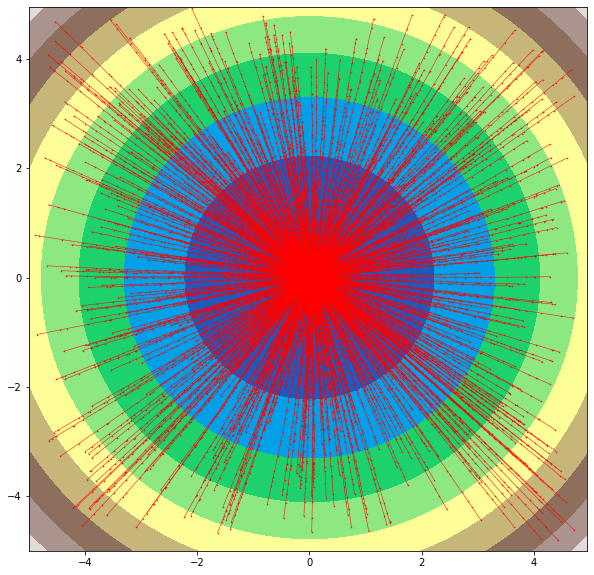

In [64]:
list_gbest_val = pso(W, c1, c2, target, n_iterations, target_error, n_particles, n_dim)